# Import des librairies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import datetime

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split




---



# Import du dataset

In [ ]:
data_meteo = pd.read_excel('/content/data_meteo_athis.xlsx')

In [ ]:
data = data_meteo

In [ ]:
data

,Date,Type de tendance barométrique,Humidité,Température (°C),mois_de_l_annee
0,2010-01-05T16:00:00+01:00,6.0,69.0,-0.5,1
1,2010-01-06T01:00:00+01:00,8.0,94.0,-4.4,1
2,2010-01-05T01:00:00+01:00,8.0,90.0,-5.6,1
3,2010-03-02T19:00:00+01:00,1.0,53.0,8.0,3
4,2010-03-01T01:00:00+01:00,1.0,83.0,3.0,3
...,...,...,...,...,...
38837,2022-11-23T13:00:00+01:00,3.0,96.0,9.9,11
38838,2022-11-17T10:00:00+01:00,1.0,84.0,11.3,11
38839,2022-11-20T19:00:00+01:00,1.0,86.0,7.8,11
38840,2022-11-27T19:00:00+01:00,8.0,74.0,9.0,11




---



# Analyse exploratoire du dataset

> Traitement du dataset

In [ ]:
data.describe()

,Type de tendance barométrique,Humidité,Température (°C),mois_de_l_annee
count,38841.000000,38841.000000,38841.000000,38842.000000
mean,4.313020,74.395175,12.210087,6.425107
std,2.706784,17.834184,7.273517,3.467677
min,0.000000,15.000000,-12.400000,1.000000
25%,2.000000,62.000000,7.000000,3.000000
50%,4.000000,78.000000,11.800000,6.000000
75%,7.000000,89.000000,17.200000,9.000000
max,8.000000,100.000000,41.400000,12.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38842 entries, 0 to 38841
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           38842 non-null  object 
 1   Type de tendance barométrique  38841 non-null  float64
 2   Humidité                       38841 non-null  float64
 3   Température (°C)               38841 non-null  float64
 4   mois_de_l_annee                38842 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ MB


> Traitement de la colonne 'Date'

In [ ]:
data

,Date,Type de tendance barométrique,Humidité,Température (°C),mois_de_l_annee
0,2010-01-05T16:00:00+01:00,6.0,69.0,-0.5,1
1,2010-01-06T01:00:00+01:00,8.0,94.0,-4.4,1
2,2010-01-05T01:00:00+01:00,8.0,90.0,-5.6,1
3,2010-03-02T19:00:00+01:00,1.0,53.0,8.0,3
4,2010-03-01T01:00:00+01:00,1.0,83.0,3.0,3
...,...,...,...,...,...
38837,2022-11-23T13:00:00+01:00,3.0,96.0,9.9,11
38838,2022-11-17T10:00:00+01:00,1.0,84.0,11.3,11
38839,2022-11-20T19:00:00+01:00,1.0,86.0,7.8,11
38840,2022-11-27T19:00:00+01:00,8.0,74.0,9.0,11


In [ ]:
#Date minimale du dataset
date_min = pd.to_datetime(data["Date"]).min()

#Date maximale du dataset
date_max = pd.to_datetime(data["Date"]).max()

print("Date minimale :", date_min)
print("Date maximale :", date_max)

Date minimale : 2010-01-01 01:00:00+01:00
Date maximale : 2023-04-25 20:00:00+02:00


In [ ]:
#Suppression des données de 2023

data["Date"] = pd.to_datetime(data["Date"], utc = True)
data = data.loc[(data["Date"].dt.year >= 2010) & (data["Date"].dt.year <= 2022)]


In [ ]:
data['Date'].value_counts()

2010-01-05 15:00:00+00:00    1
2021-12-06 09:00:00+00:00    1
2022-01-17 21:00:00+00:00    1
2022-01-21 06:00:00+00:00    1
2022-01-25 15:00:00+00:00    1
                            ..
2010-02-11 18:00:00+00:00    1
2011-09-17 09:00:00+00:00    1
2011-09-17 21:00:00+00:00    1
2010-02-05 00:00:00+00:00    1
2022-11-25 21:00:00+00:00    1
Name: Date, Length: 37928, dtype: int64

In [ ]:
data['Dates'] = data['Date'].dt.date
data['Heure'] = data['Date'].dt.time

<ipython-input-11-b1af7474c392>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dates'] = data['Date'].dt.date
<ipython-input-11-b1af7474c392>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Heure'] = data['Date'].dt.time


In [ ]:
data = data.drop(['Date', 'Heure'], axis = 1)

In [ ]:
data["Dates"] = pd.to_datetime(data["Dates"], utc = True)

In [ ]:
data

,Type de tendance barométrique,Humidité,Température (°C),mois_de_l_annee,Dates
0,6.0,69.0,-0.5,1,2010-01-05 00:00:00+00:00
1,8.0,94.0,-4.4,1,2010-01-06 00:00:00+00:00
2,8.0,90.0,-5.6,1,2010-01-05 00:00:00+00:00
3,1.0,53.0,8.0,3,2010-03-02 00:00:00+00:00
4,1.0,83.0,3.0,3,2010-03-01 00:00:00+00:00
...,...,...,...,...,...
38837,3.0,96.0,9.9,11,2022-11-23 00:00:00+00:00
38838,1.0,84.0,11.3,11,2022-11-17 00:00:00+00:00
38839,1.0,86.0,7.8,11,2022-11-20 00:00:00+00:00
38840,8.0,74.0,9.0,11,2022-11-27 00:00:00+00:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37928 entries, 0 to 38841
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   Type de tendance barométrique  37927 non-null  float64            
 1   Humidité                       37927 non-null  float64            
 2   Température (°C)               37927 non-null  float64            
 3   mois_de_l_annee                37928 non-null  int64              
 4   Dates                          37928 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(3), int64(1)
memory usage: 1.7 MB


> Quelques statistiques descriptives

In [ ]:
data

,Type de tendance barométrique,Humidité,Température (°C),mois_de_l_annee,Dates
0,6.0,69.0,-0.5,1,2010-01-05 00:00:00+00:00
1,8.0,94.0,-4.4,1,2010-01-06 00:00:00+00:00
2,8.0,90.0,-5.6,1,2010-01-05 00:00:00+00:00
3,1.0,53.0,8.0,3,2010-03-02 00:00:00+00:00
4,1.0,83.0,3.0,3,2010-03-01 00:00:00+00:00
...,...,...,...,...,...
38837,3.0,96.0,9.9,11,2022-11-23 00:00:00+00:00
38838,1.0,84.0,11.3,11,2022-11-17 00:00:00+00:00
38839,1.0,86.0,7.8,11,2022-11-20 00:00:00+00:00
38840,8.0,74.0,9.0,11,2022-11-27 00:00:00+00:00


In [ ]:
#Tendance barométrique
data['Type de tendance barométrique'].describe()

count    37927.000000
mean         4.312521
std          2.707062
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          8.000000
Name: Type de tendance barométrique, dtype: float64

In [ ]:
#Humidité
data['Humidité'].describe()

count    37927.000000
mean        74.366309
std         17.909659
min         15.000000
25%         62.000000
50%         78.000000
75%         89.000000
max        100.000000
Name: Humidité, dtype: float64

In [ ]:
#Température
data['Température (°C)'].describe()

count    37927.000000
mean        12.317220
std          7.296232
min        -12.400000
25%          7.000000
50%         12.000000
75%         17.400000
max         41.400000
Name: Température (°C), dtype: float64



> Evolution de la température par année et par mois



In [ ]:
# Extract month and year from the 'Date' column
data['Année'] = data['Dates'].dt.year
data['Mois_'] = data['Dates'].dt.month

In [ ]:
data

,Type de tendance barométrique,Humidité,Température (°C),mois_de_l_annee,Dates,Année,Mois_
0,6.0,69.0,-0.5,1,2010-01-05 00:00:00+00:00,2010,1
1,8.0,94.0,-4.4,1,2010-01-06 00:00:00+00:00,2010,1
2,8.0,90.0,-5.6,1,2010-01-05 00:00:00+00:00,2010,1
3,1.0,53.0,8.0,3,2010-03-02 00:00:00+00:00,2010,3
4,1.0,83.0,3.0,3,2010-03-01 00:00:00+00:00,2010,3
...,...,...,...,...,...,...,...
38837,3.0,96.0,9.9,11,2022-11-23 00:00:00+00:00,2022,11
38838,1.0,84.0,11.3,11,2022-11-17 00:00:00+00:00,2022,11
38839,1.0,86.0,7.8,11,2022-11-20 00:00:00+00:00,2022,11
38840,8.0,74.0,9.0,11,2022-11-27 00:00:00+00:00,2022,11


In [ ]:
moyenne_temp = data.groupby(['Année', 'Mois_'])['Température (°C)'].mean().reset_index()
print(moyenne_temp)

     Année  Mois_  Température (°C)
0     2010      1          0.627016
1     2010      2          3.724107
2     2010      3          7.270445
3     2010      4         11.395359
4     2010      5         13.056048
..     ...    ...               ...
151   2022      8         22.774194
152   2022      9         16.480833
153   2022     10         15.346371
154   2022     11          9.425833
155   2022     12          5.053226

[156 rows x 3 columns]




> Evolution de la température par année



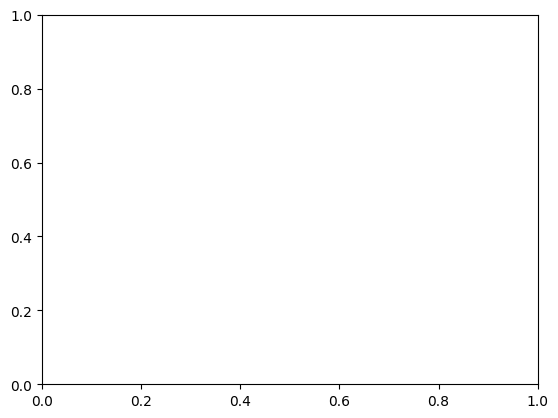

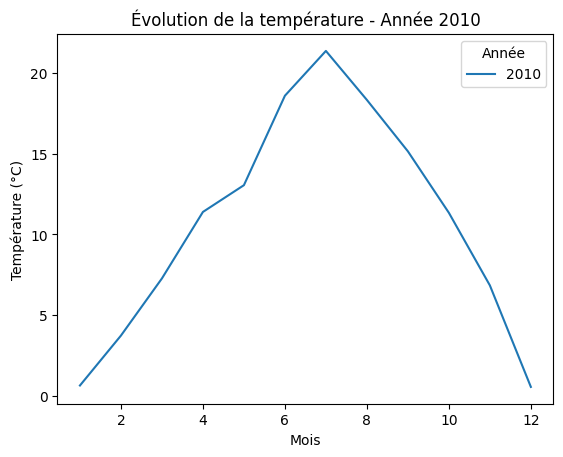

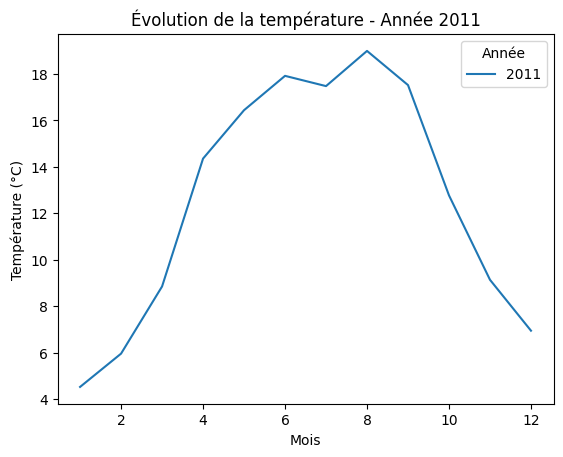

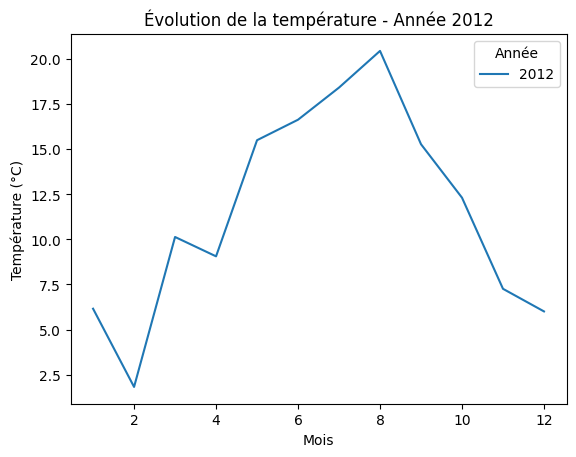

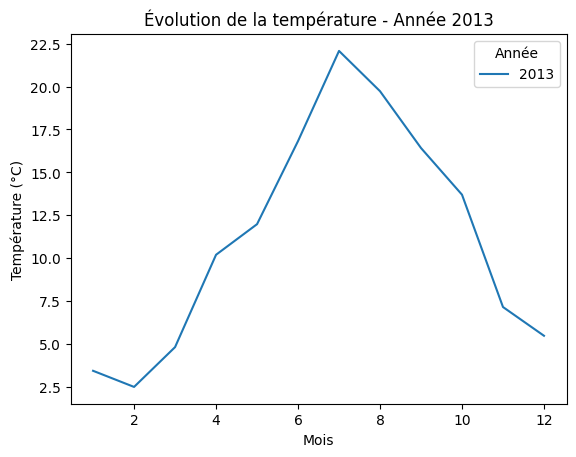

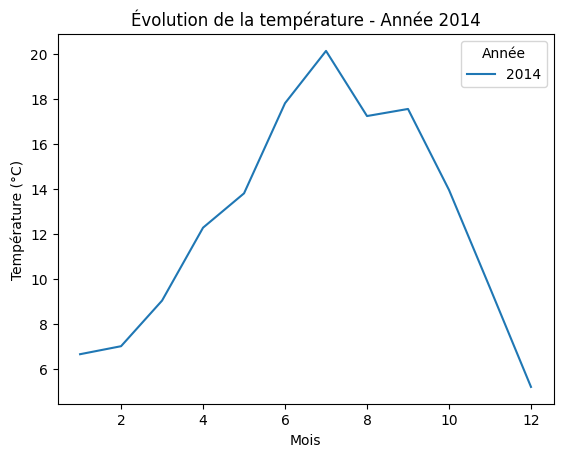

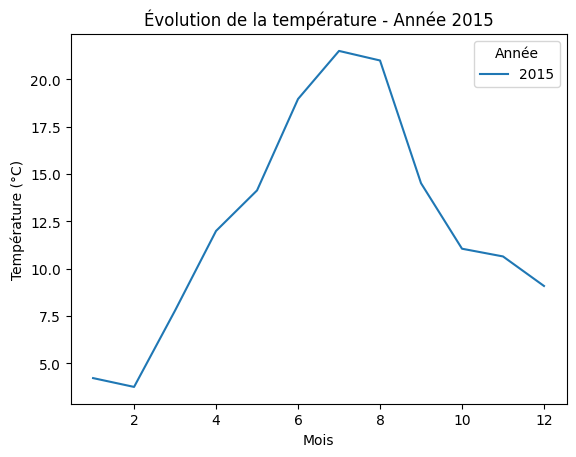

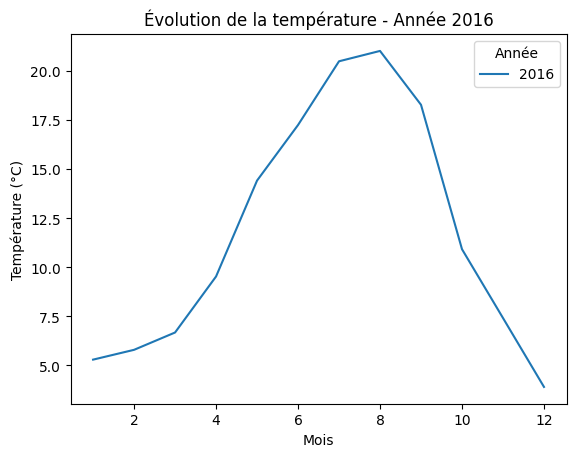

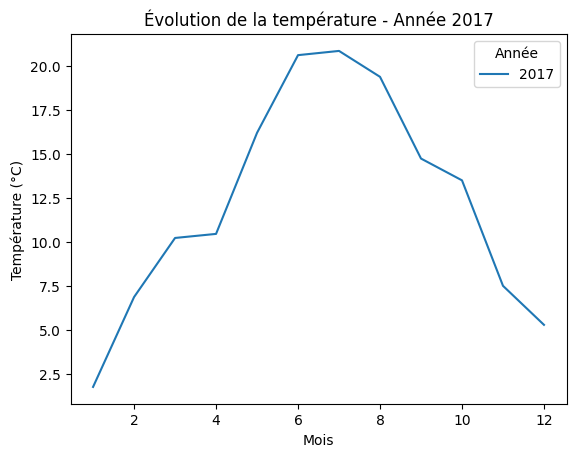

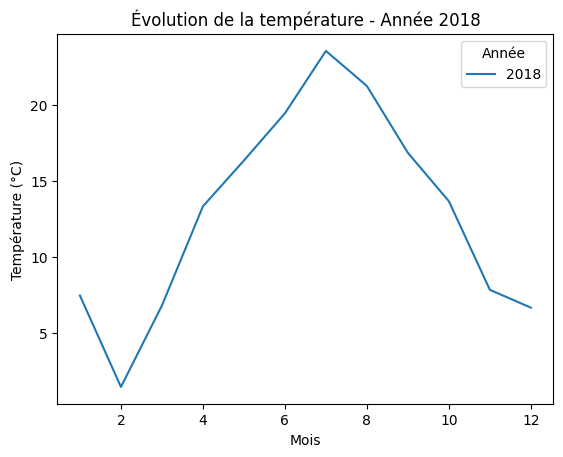

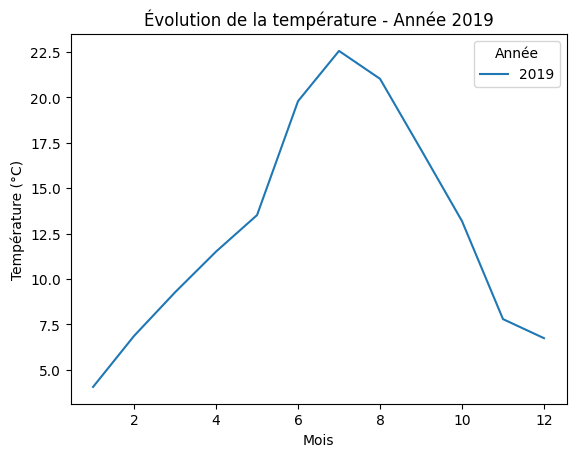

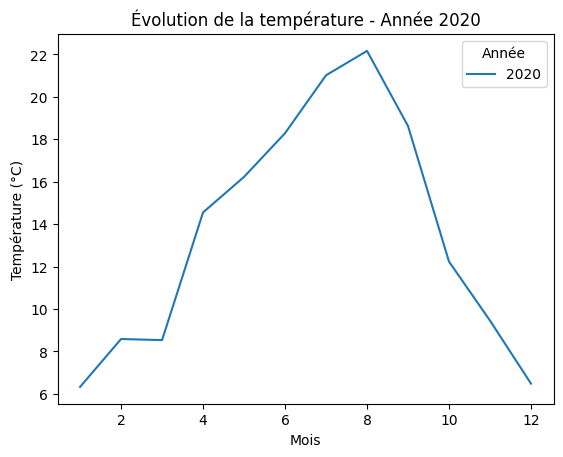

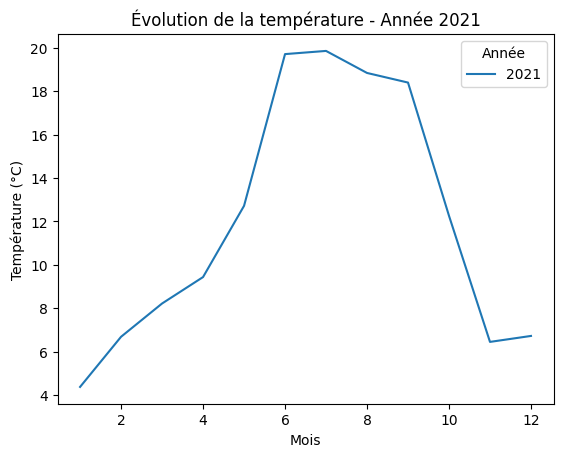

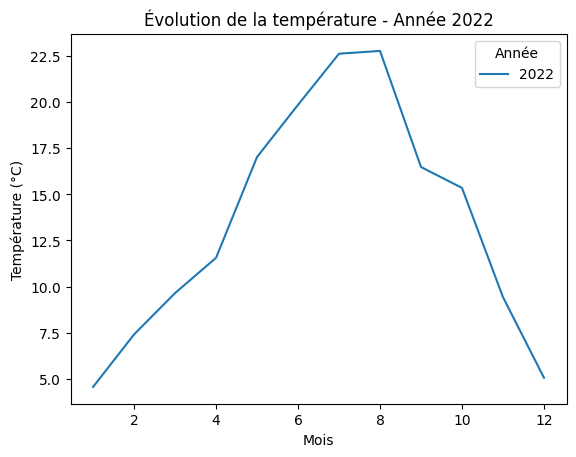

In [ ]:

# Filter the data for the desired years
start_year = 2010
end_year = 2022
filtered_data = moyenne_temp[(moyenne_temp['Année'] >= start_year) & (moyenne_temp['Année'] <= end_year)]

# Initialize the figure and axis
fig, ax = plt.subplots()

# Iterate over each year
for year in range(start_year, end_year + 1):
    # Filter the data for the current year
    year_data = filtered_data[filtered_data['Année'] == year]

    # Get the month and temperature values
    months = year_data['Mois_']
    temperatures = year_data['Température (°C)']

    # Create a new figure and axis for the current year
    fig, ax = plt.subplots()

    # Plot the temperature for the current year as a line
    ax.plot(months, temperatures, label=year)

    # Set the title and labels for the current year
    ax.set_title(f"Évolution de la température - Année {year}")
    ax.set_xlabel("Mois")
    ax.set_ylabel("Température (°C)")

    # Add a legend
    ax.legend(title="Année")

    # Show the plot for the current year
    plt.show()



<ipython-input-26-03591f634a64>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


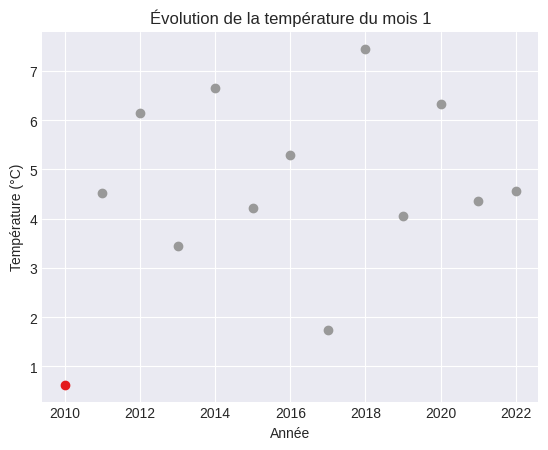

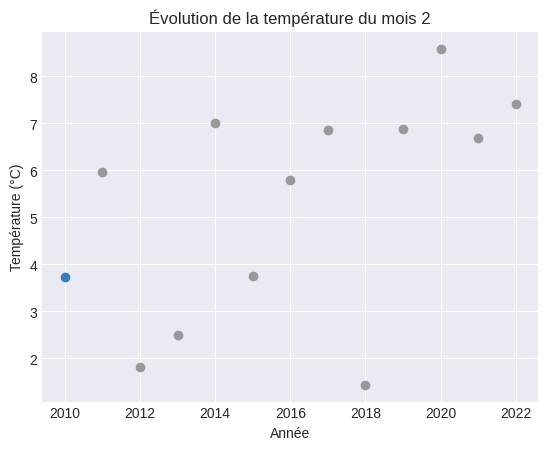

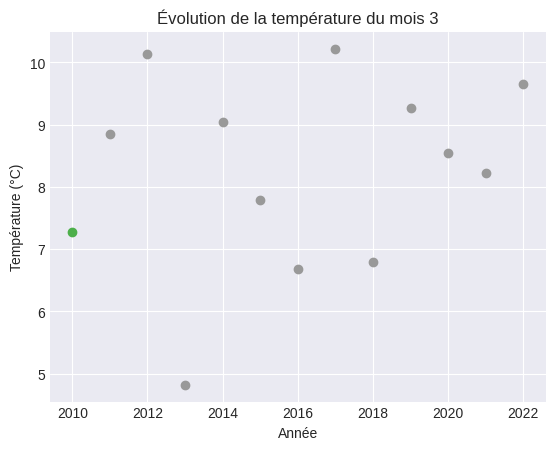

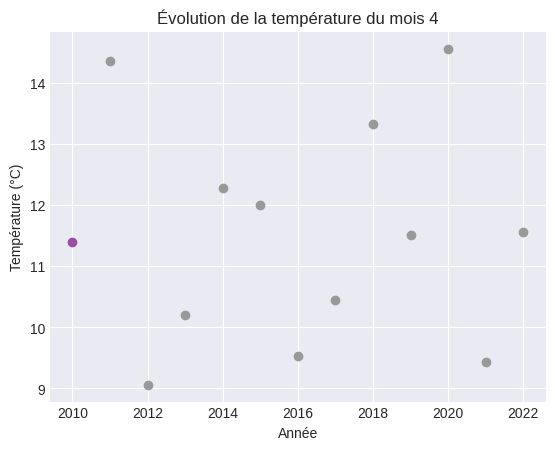

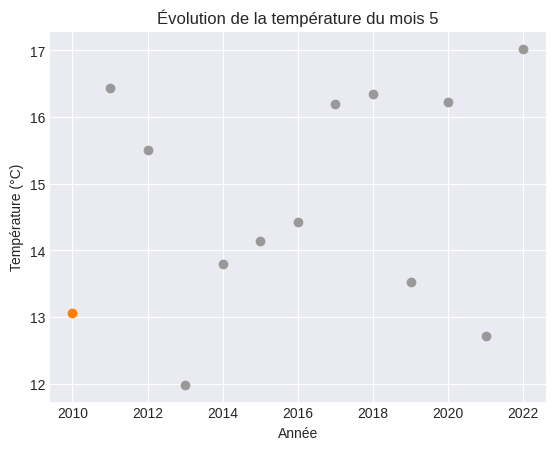

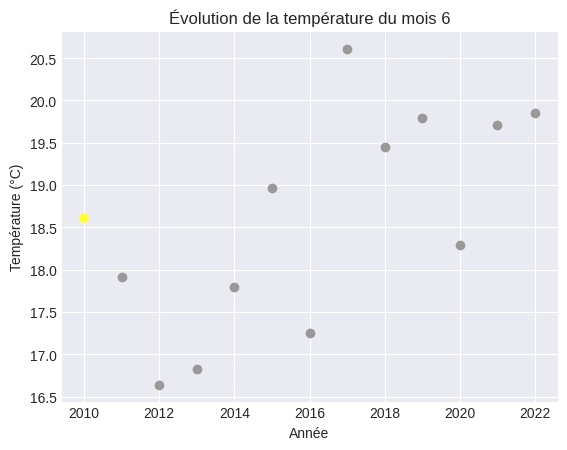

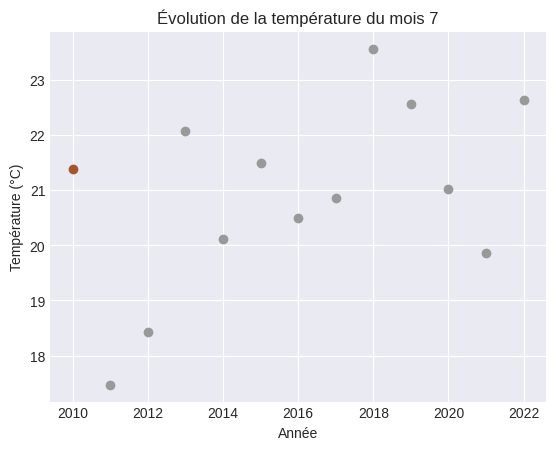

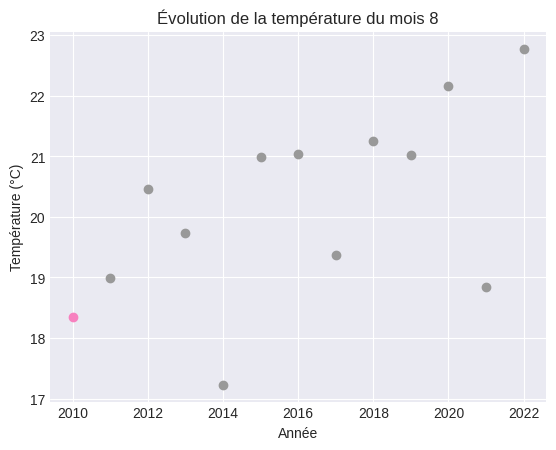

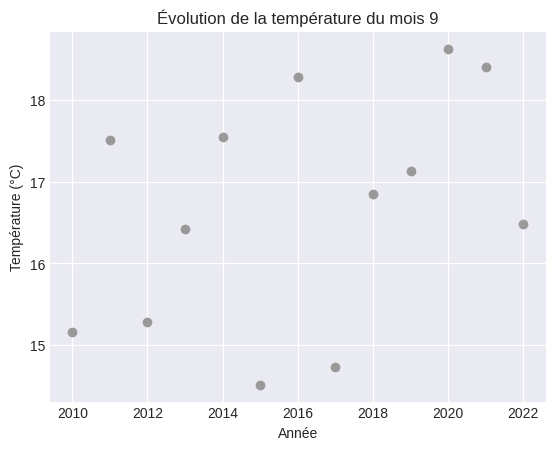

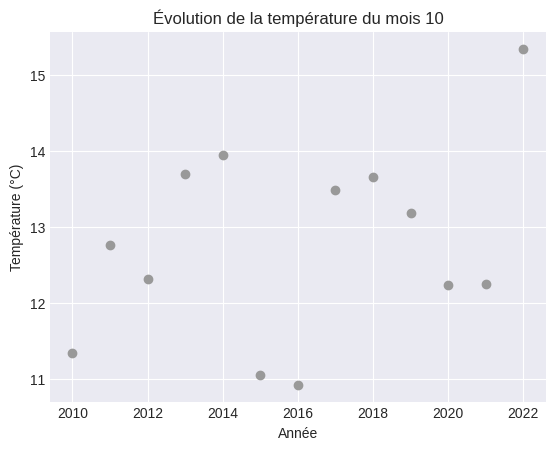

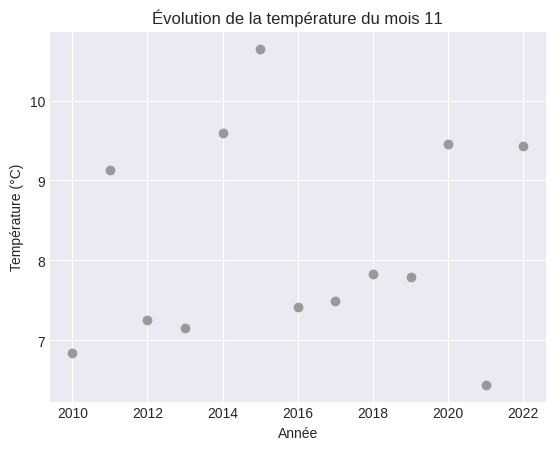

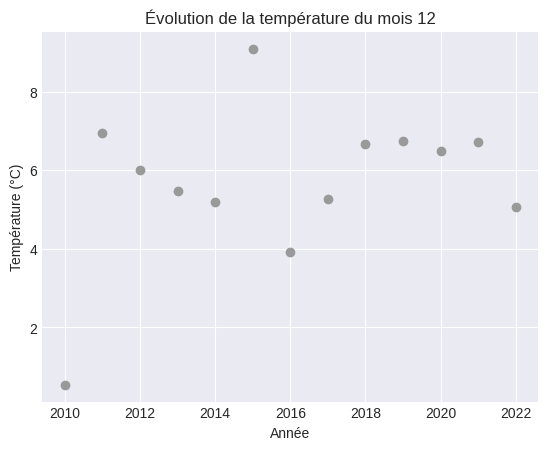

In [ ]:
# Style de figure
plt.style.use('seaborn-darkgrid')

# Palette de couleur
palette = plt.get_cmap('Set1')

# Itération pour chaque mois
for month in range(1, 13):
    month_data = moyenne_temp[moyenne_temp['Mois_'] == month]
    fig, ax = plt.subplots()

    # Itération sur chaque année
    for i, row in month_data.iterrows():
        year = row['Année']
        temperature = row['Température (°C)']

        ax.plot(year, temperature, marker='o', color=palette(i), label=year)

    # Titres
    ax.set_title(f"Évolution de la température du mois {month}")
    ax.set_xlabel('Année')
    ax.set_ylabel('Température (°C)')


    plt.show()




> Corrélation entre la température et l'humidité



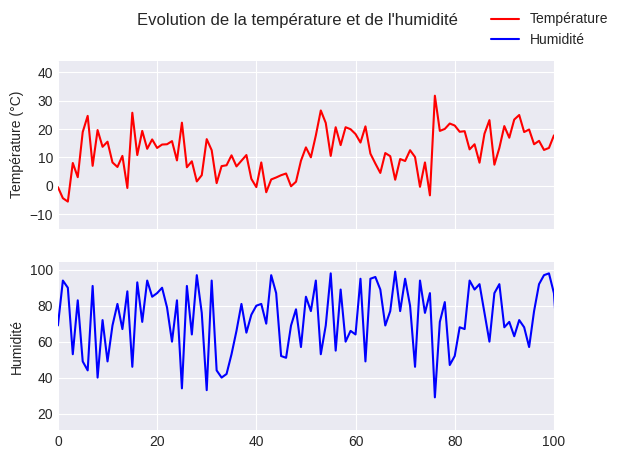

In [ ]:
# Extraire les données de température et d'humidité
temperature = data["Température (°C)"]
humidite = data["Humidité"]

# Créer une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

# Tracer la courbe de l'évolution de la température
ax1.plot(temperature, color='r')
ax1.set_ylabel("Température (°C)")

# Tracer la courbe de l'évolution de l'humidité
ax2.plot(humidite, color='b')
ax2.set_ylabel("Humidité")

# Ajouter une légende et un titre commun
fig.legend(["Température", "Humidité"], loc='upper right')
fig.suptitle("Evolution de la température et de l'humidité")

ax1.set_xlim([0, 100])
ax2.set_xlim([0, 100])

# Afficher le graphique
plt.show()




---



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37928 entries, 0 to 38841
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   Type de tendance barométrique  37927 non-null  float64            
 1   Humidité                       37927 non-null  float64            
 2   Température (°C)               37927 non-null  float64            
 3   mois_de_l_annee                37928 non-null  int64              
 4   Dates                          37928 non-null  datetime64[ns, UTC]
 5   Année                          37928 non-null  int64              
 6   Mois_                          37928 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(3), int64(3)
memory usage: 2.3 MB


# Modèle ARMA : Prédiction de la température en 2023

In [ ]:
data.head()

,Type de tendance barométrique,Humidité,Température (°C),mois_de_l_annee,Dates,Année,Mois_
0,6.0,69.0,-0.5,1,2010-01-05 00:00:00+00:00,2010,1
1,8.0,94.0,-4.4,1,2010-01-06 00:00:00+00:00,2010,1
2,8.0,90.0,-5.6,1,2010-01-05 00:00:00+00:00,2010,1
3,1.0,53.0,8.0,3,2010-03-02 00:00:00+00:00,2010,3
4,1.0,83.0,3.0,3,2010-03-01 00:00:00+00:00,2010,3


In [ ]:
data = data.drop('Shifted_values_1', axis = 1)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

def ARMAModel(p, q, data):
    # Extraction des colonnes 'Dates' et 'Température (°C)' du DataFrame
    dates = data['Dates']
    temperature = data['Température (°C)']

    # Tri du DataFrame par ordre croissant des dates
    data_sorted = data.sort_values('Dates')

    # Séparation des données en train et test
    train_dates, test_dates, train_temperature, test_temperature = train_test_split(dates, temperature, test_size=0.2, shuffle=False)

    # Réinitialisation de l'index du DataFrame test_dates
    test_dates = test_dates.reset_index(drop=True)

    # Entraînement du modèle ARMA
    predictions = []

    for t in range(max(p, q), len(test_dates)):
        # Sélection des données d'entraînement pour la prédiction actuelle
        train_data = train_temperature[t-p:t]
        residuals = train_temperature[t-q:t]

        # Estimation des coefficients AR et MA
        phi = np.polyfit(range(p), train_data, deg=1)
        theta = np.polyfit(range(q), residuals, deg=1)

        # Prédiction de la température à l'aide des coefficients estimés
        predicted_temperature = np.sum(phi * train_data) + np.sum(theta * residuals)
        predictions.append(predicted_temperature)

    # Calcul de l'erreur de prédiction (RMSE)
    rmse = np.sqrt(mean_squared_error(test_temperature[max(p, q):], predictions))

    return predictions, rmse

# Supprimer les lignes contenant des valeurs manquantes dans le DataFrame
data = data.dropna()

# Appel de la fonction ARMAModel avec p=2 et q=2
p = 2
q = 2
predictions, rmse = ARMAModel(p, q, data)

# Affichage des prédictions et du RMSE
print("Prédictions pour 2023:", predictions)
print("RMSE:", rmse)


Prédictions pour 2023: [8.299999999999955, 59.839999999999264, -241.91999999999808, -32.00000000000002, 208.80000000000035, 1145.3400000000022, -521.5200000000016, 450.8000000000005, 305.76000000000295, 474.02000000000015, 27.900000000002763, 82.00000000000043, 190.08000000000027, -254.0999999999981, -83.51999999999524, -210.74000000000194, 600.4800000000008, 258.61999999999944, 509.6000000000004, 335.7800000000005, 417.62, 426.3000000000012, 490.5600000000027, 65.94000000000082, 631.9000000000033, -408.480000000003, 139.10000000000053, -96.32000000000065, 17.70000000000027, 215.34000000000276, 282.07999999999925, -267.4999999999983, 23.220000000000944, 103.50000000000125, 204.4800000000019, 62.05999999999973, 146.88000000000034, 225.28000000000043, -129.59999999999886, -16.32000000000039, -16.90000000000009, -209.92000000000036, -30.81999999999959, 15.840000000000424, 26.100000000000627, 36.26000000000027, -40.42, -1.1999999999999544, 45.360000000001065, 320.3200000000001, 175.4999999

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

def ARMAModel(p, q, data):
    # Extraction des colonnes 'Dates' et 'Température (°C)' du DataFrame
    dates = data['Dates']
    temperature = data['Température (°C)']

    # Tri du DataFrame par ordre croissant des dates
    data_sorted = data.sort_values('Dates')

    # Séparation des données en train et test
    train_dates, test_dates, train_temperature, test_temperature = train_test_split(dates, temperature, test_size=0.2, shuffle=False)

    # Réinitialisation de l'index du DataFrame test_dates
    test_dates = test_dates.reset_index(drop=True)

    # Variables pour stocker les meilleures valeurs de p, q et RMSE
    best_p = 0
    best_q = 0
    best_rmse = float('inf')
    best_predictions = []

    # Boucle d'optimisation des paramètres
    for p in range(1, 61):
        for q in range(1, 31):
            # Entraînement du modèle ARMA
            predictions = []

            for t in range(max(p, q), len(test_dates)):
                # Sélection des données d'entraînement pour la prédiction actuelle
                train_data = train_temperature[t-p:t]
                residuals = train_temperature[t-q:t]

                # Estimation des coefficients AR et MA
                model = sm.tsa.arima.model.ARIMA(train_data, order=(p, 0, q))
                model_fit = model.fit(disp=0)
                phi = model_fit.params[:p]
                theta = model_fit.params[p:]

                # Prédiction de la température à l'aide des coefficients estimés
                predicted_temperature = np.dot(phi, train_data[::-1]) + np.dot(theta, residuals[::-1])
                predictions.append(predicted_temperature)

            # Calcul de l'erreur de prédiction (RMSE)
            rmse = np.sqrt(mean_squared_error(test_temperature[max(p, q):], predictions))

            # Mise à jour des meilleures valeurs si la RMSE est améliorée
            if rmse < best_rmse:
                best_p = p
                best_q = q
                best_rmse = rmse
                best_predictions = predictions

    return best_p, best_q, best_predictions, best_rmse

# Supprimer les lignes contenant des valeurs manquantes dans le DataFrame
data = data.dropna()

# Appel de la fonction ARMAModel pour optimiser les paramètres
best_p, best_q, predictions, rmse = ARMAModel(60, 30, data)

# Affichage des meilleures valeurs de p, q, prédictions et RMSE
print("Meilleures valeurs de p, q :", best_p, ",", best_q)
print("Prédictions pour 2023 :", predictions)
print("RMSE :", rmse)


AttributeError: ignored